In [7]:
%reload_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np
import dataloader
import modelController
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
loan = dataloader.LoanForest()
data = loan.data
column_names = loan.column_names
X, y = dataloader.split_variables_and_target(data)




In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

random_forest_classifier = modelController.ModelController(RandomForestClassifier(n_estimators=100, min_samples_split=5))
random_forest_classifier.predict(X, y, 5)


ada_boost_classifier = modelController.ModelController(AdaBoostClassifier(n_estimators=100))
ada_boost_classifier.predict(X, y, 5)

gradient_boosting_classifier = modelController.ModelController(GradientBoostingClassifier(n_estimators=100))
gradient_boosting_classifier.predict(X, y, 5)

bagging_classifier = modelController.ModelController(BaggingClassifier(n_estimators=100))
bagging_classifier.predict(X, y, 5)

voting_classifier = modelController.ModelController(VotingClassifier(estimators=[('rf', random_forest_classifier.model), ('ada', ada_boost_classifier.model), ('gb', gradient_boosting_classifier.model), ('bc', bagging_classifier.model)], voting='hard'))
voting_classifier.predict(X, y, 5)




C:\Users\tobia\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\tobia\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\tobia\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\tobia\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

In [17]:
models = [random_forest_classifier, ada_boost_classifier, gradient_boosting_classifier, bagging_classifier, voting_classifier]

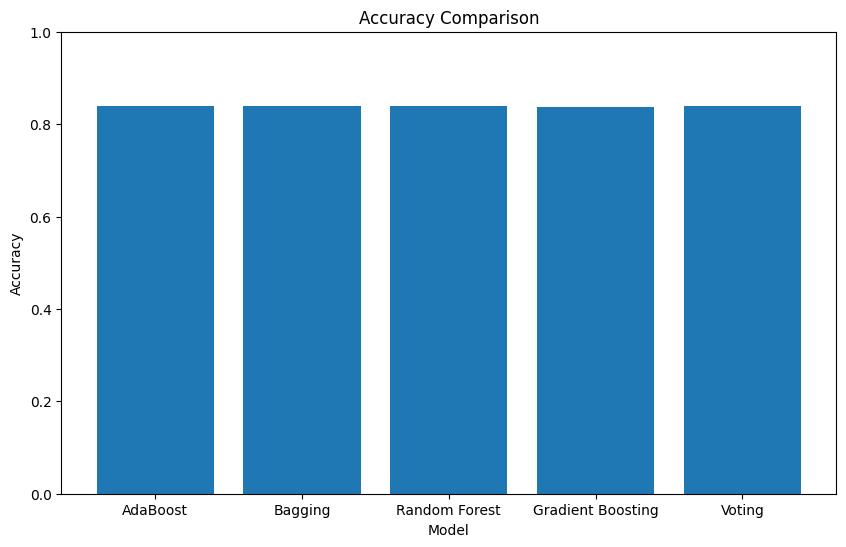

In [18]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_values = [model.accuracy_avg for model in models]
# Model names
model_names = ['AdaBoost', 'Bagging', 'Random Forest', 'Gradient Boosting', 'Voting']

# Create the graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1.0)  # Set the y-axis limits if needed
plt.show()


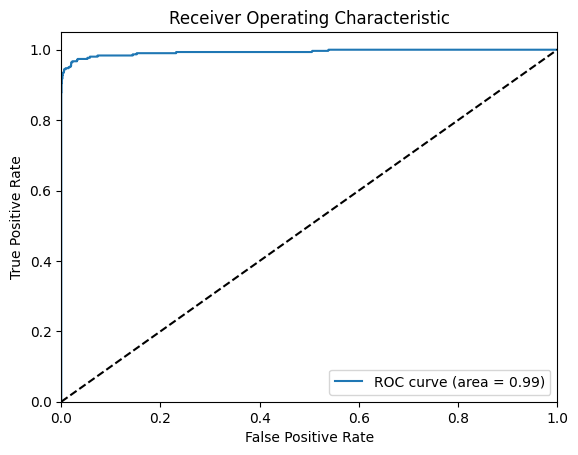

: 

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



# Compute the predicted probabilities for the positive class
y_pred_proba = random_forest_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
